In [2]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# custom imports
import acquire_telco as a
import prepare_telco as p

# Exploration Exercises I - Telco

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named `explore.ipynb`. In addition, you should create a file named `explore.py` that contains the following functions for exploring your variables (features & target).

## 1.

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [59]:
df = a.get_telco_data() # get telco data
df = p.clean_telco(df)
train, validate, test = p.split_telco(df)
train.shape, validate.shape, test.shape

((4225, 20), (1409, 20), (1409, 20))

## 2.

Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

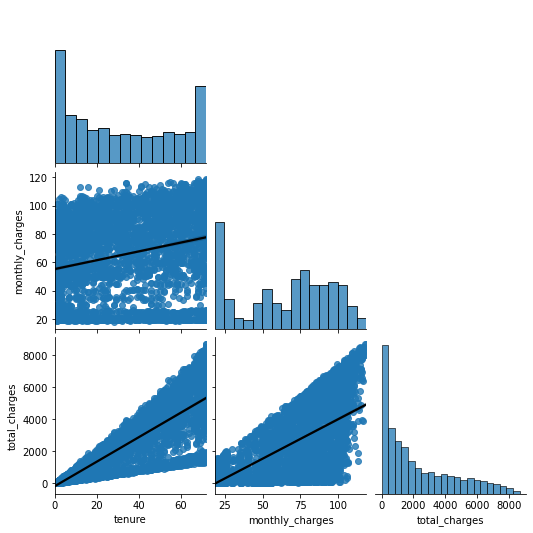

In [39]:
sns.pairplot(data=train, kind='reg', plot_kws={'line_kws':{'color':'black'}}, corner=True);

In [44]:
def plot_variable_pairs(df):
    sns.pairplot(data=df, kind='reg', plot_kws={'line_kws':{'color':'black'}}, corner=True);

**Take a look at this plot through the lens of all categorical variables**

In [31]:
cat_cols = train.select_dtypes('object').columns.tolist()
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

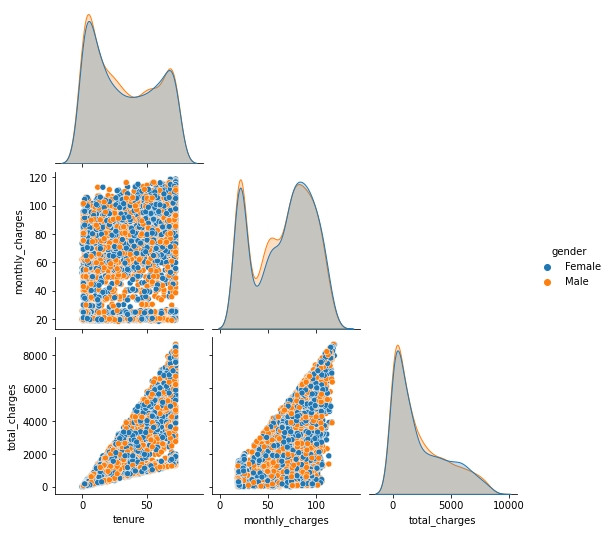

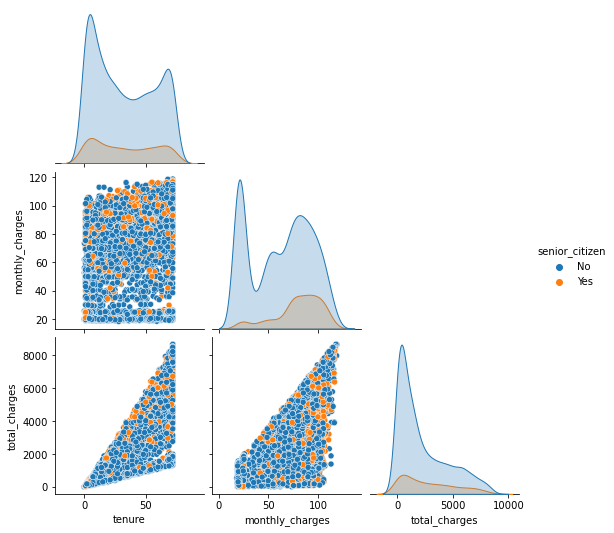

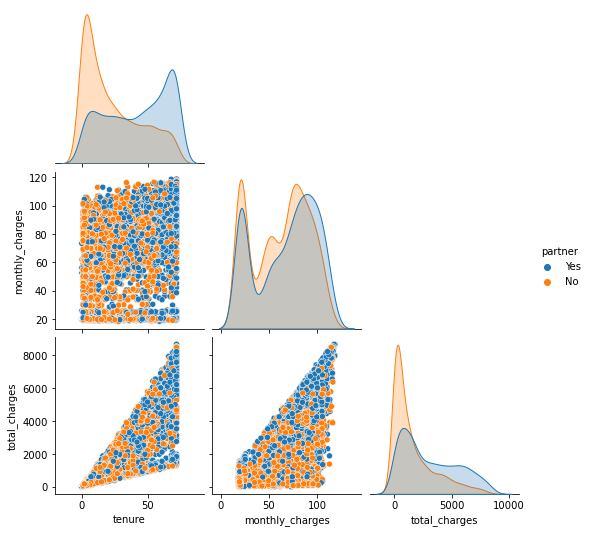

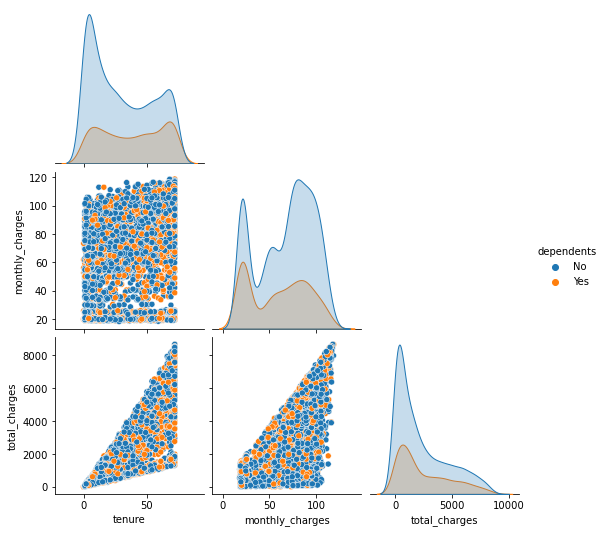

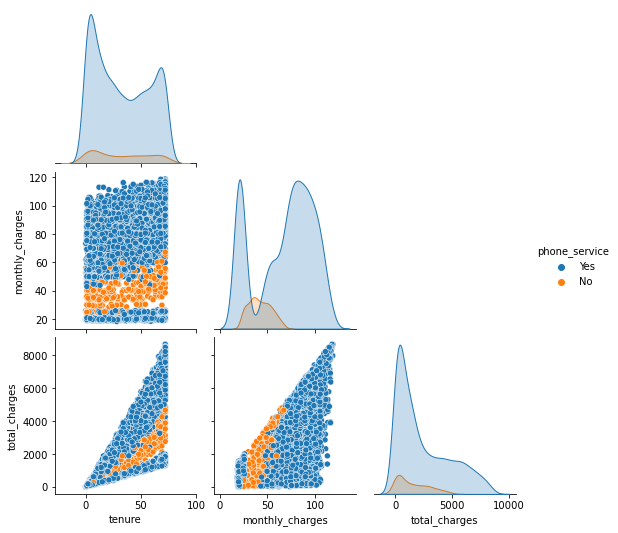

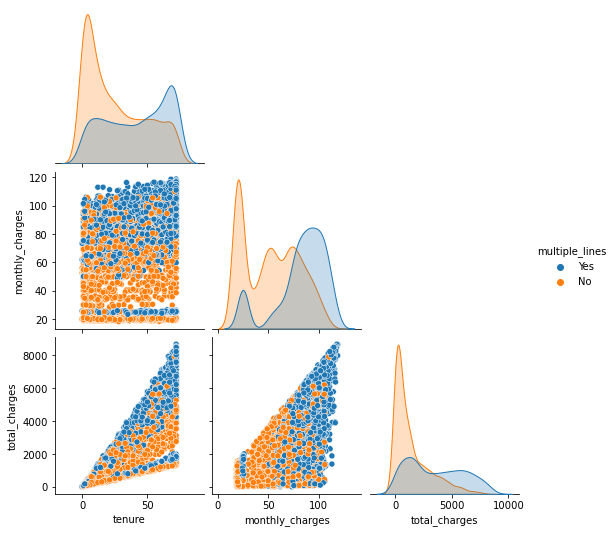

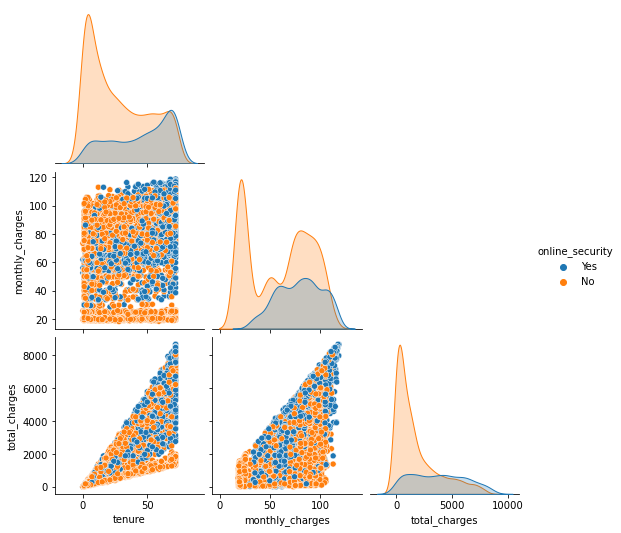

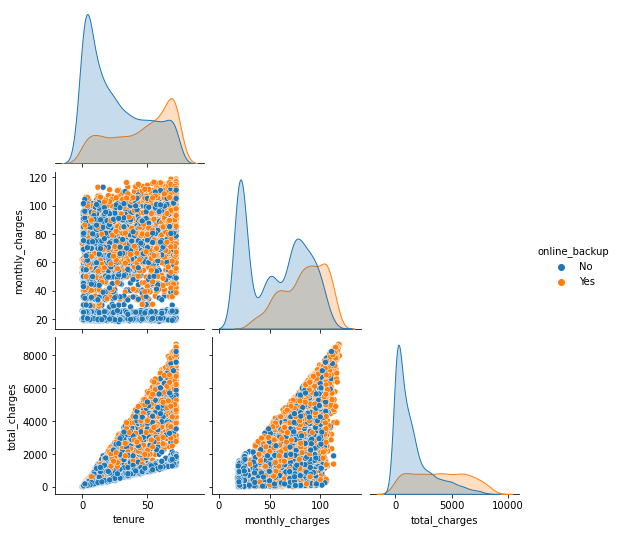

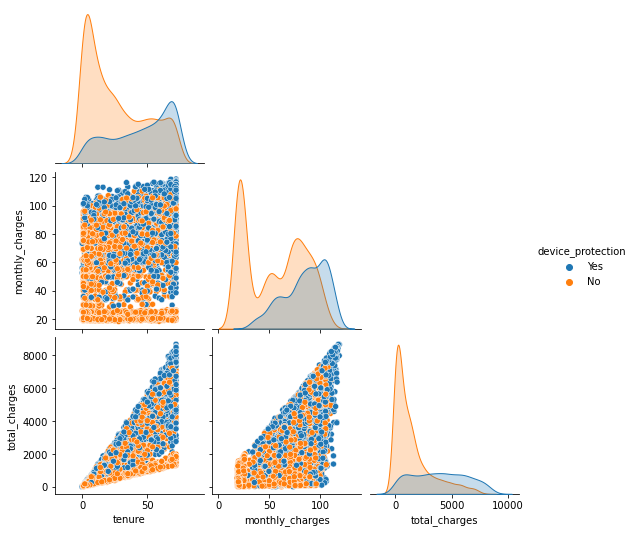

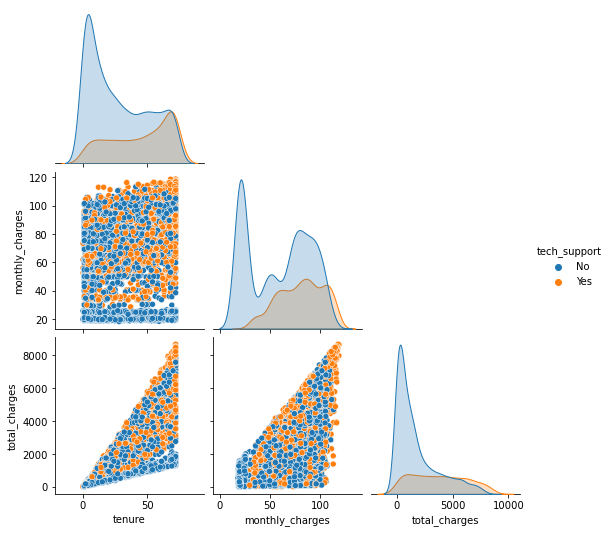

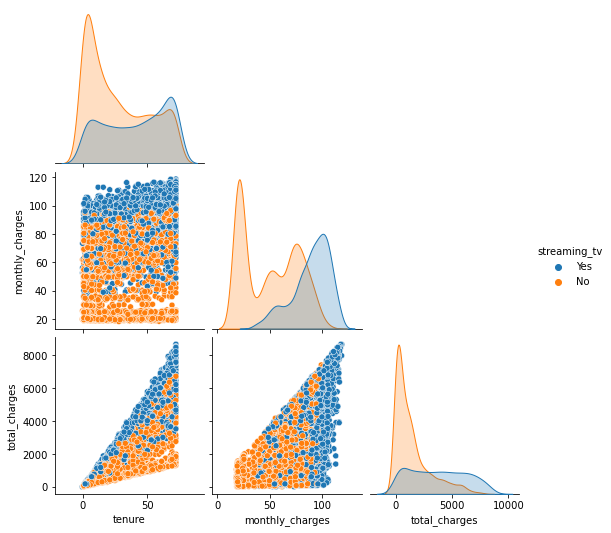

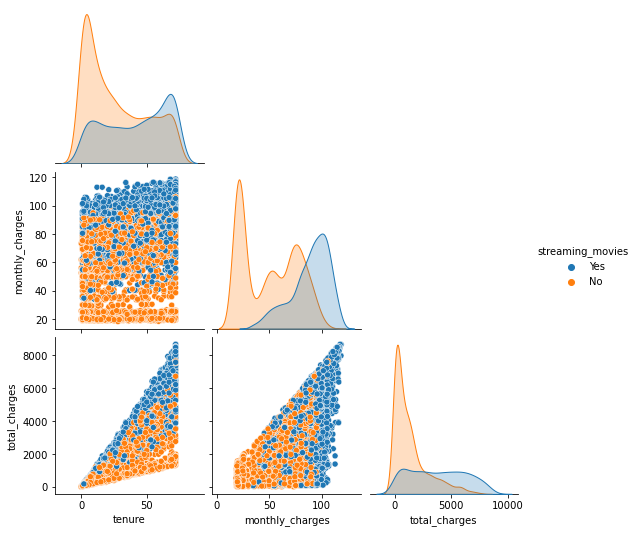

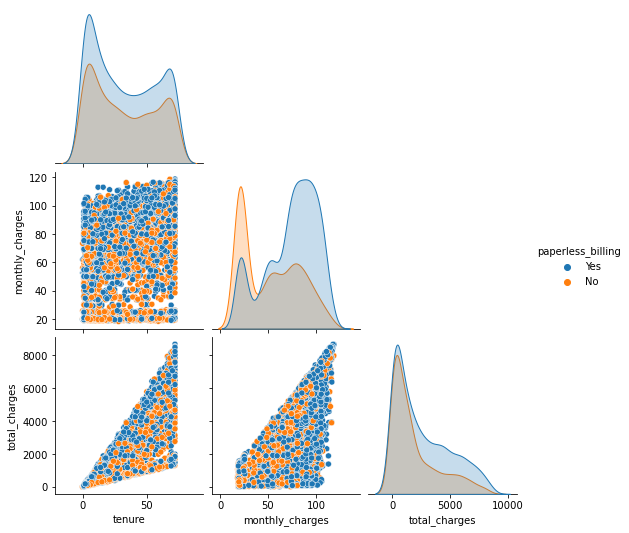

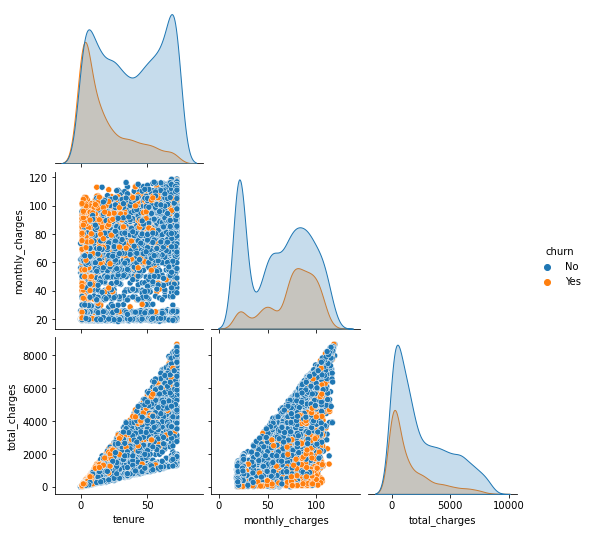

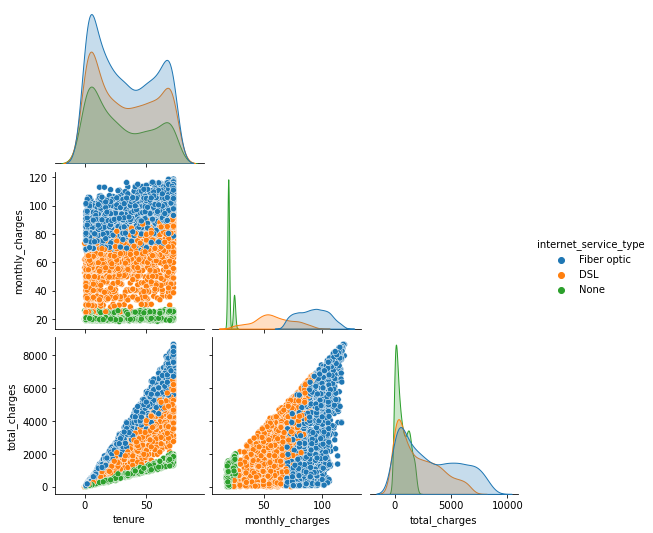

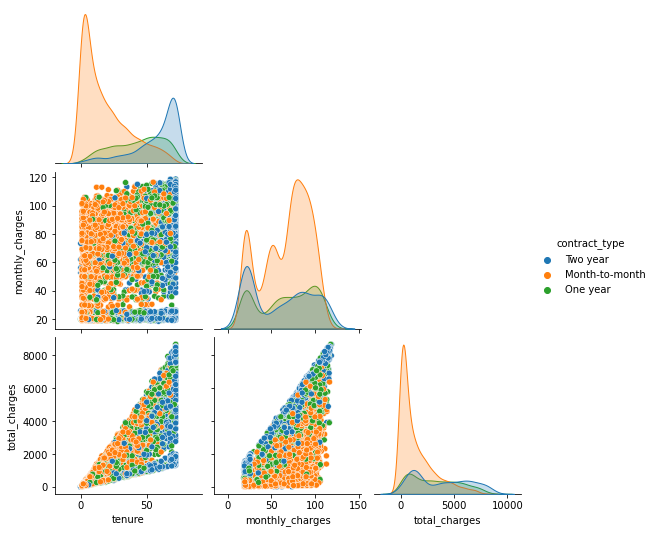

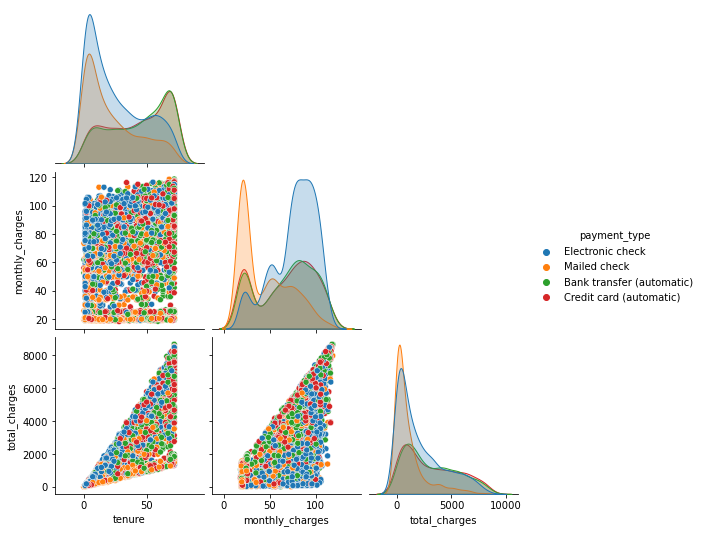

In [40]:
for cat in cat_cols:
    sns.pairplot(data=train, hue=cat, corner=True);

In [45]:
def plot_variable_pairs_cat_hue(df):
    cat_cols = df.select_dtypes('object').columns.tolist()
    for cat in cat_cols:
        sns.pairplot(data=train, hue=cat, corner=True);

## 3.

Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [56]:
# I will assume that the 'complete years' phrase in the instructions means that I should round each tenure to the nearest year
df['tenure_years'] = round(df.tenure / 12, 0).astype('int')

In [60]:
def months_to_years(telco_df):
    telco_df['tenure_years'] = round(df.tenure / 12, 0).astype('int')
    return telco_df

## 4.

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

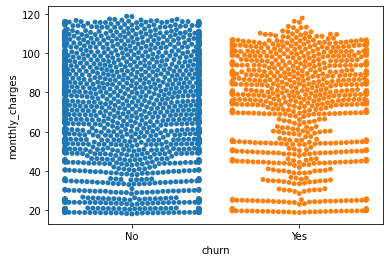

In [79]:
sns.swarmplot(x='churn', y='monthly_charges', data=train);

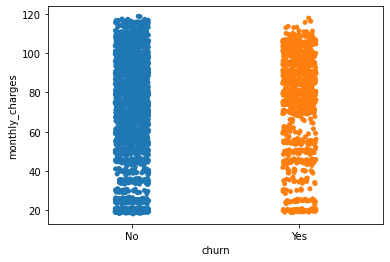

In [77]:
sns.stripplot(x='churn', y='monthly_charges', data=train);

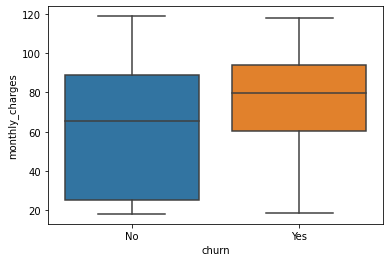

In [69]:
sns.boxplot(x='churn', y='monthly_charges', data=train);

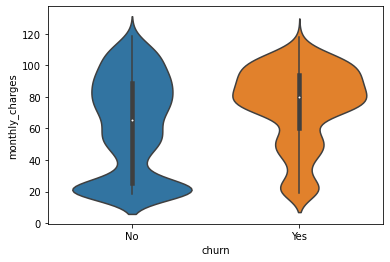

In [70]:
sns.violinplot(x='churn', y='monthly_charges', data=train);

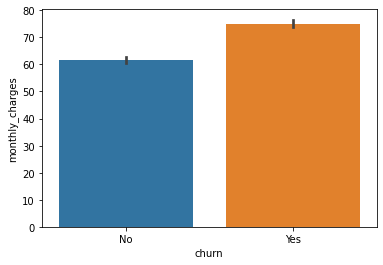

In [71]:
sns.barplot(x='churn', y='monthly_charges', data=train);

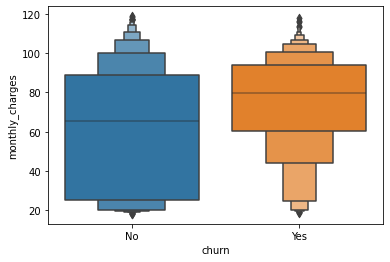

In [72]:
sns.boxenplot(x='churn', y='monthly_charges', data=train);

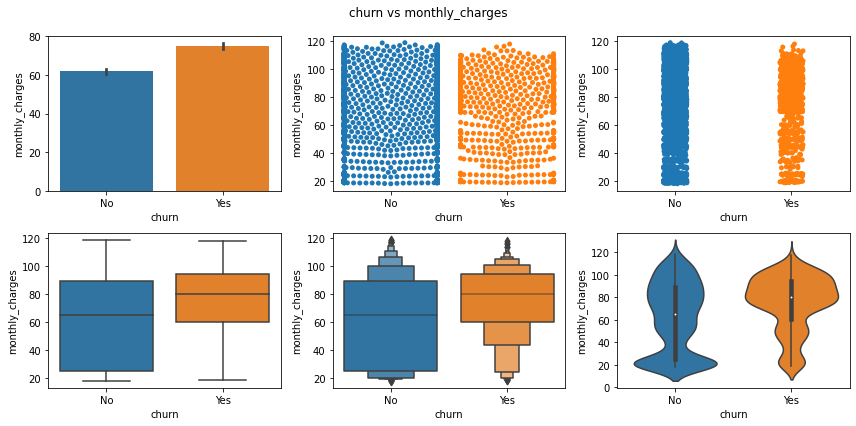

In [94]:
fig = plt.figure(figsize = (12,6))
fig.suptitle('churn vs monthly_charges')

gs = plt.GridSpec(2,3)

ax1 = fig.add_subplot(gs[0,0])
sns.barplot(x='churn', y='monthly_charges', data=train)

ax2 = fig.add_subplot(gs[0,1])
sns.swarmplot(x='churn', y='monthly_charges', data=train)

ax3 = fig.add_subplot(gs[0,2])
sns.stripplot(x='churn', y='monthly_charges', data=train)

ax4 = fig.add_subplot(gs[1,0])
sns.boxplot(x='churn', y='monthly_charges', data=train)

ax5 = fig.add_subplot(gs[1,1])
sns.boxenplot(x='churn', y='monthly_charges', data=train)

ax6 = fig.add_subplot(gs[1,2])
sns.violinplot(x='churn', y='monthly_charges', data=train)

plt.tight_layout();

In [95]:
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [115]:
num_cols

['monthly_charges']

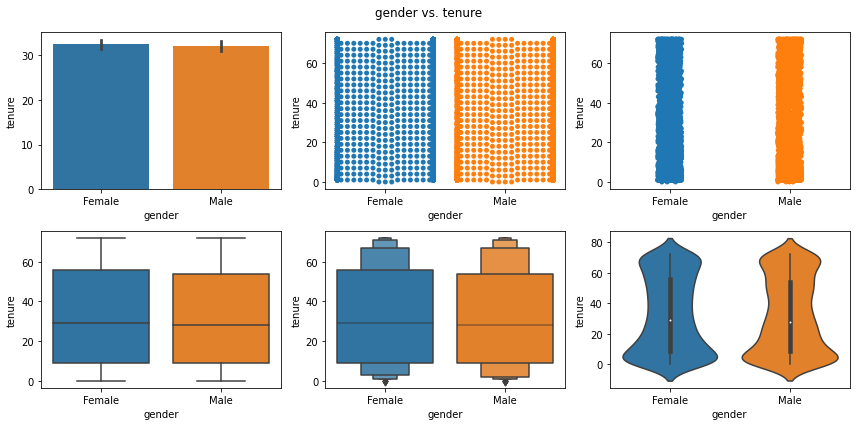

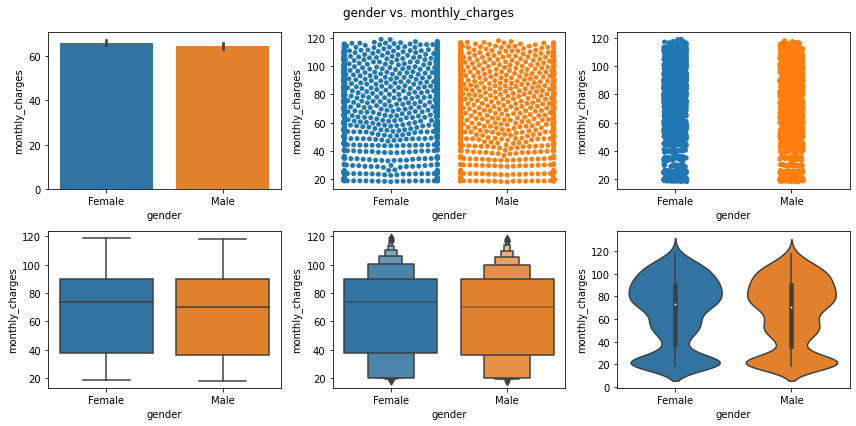

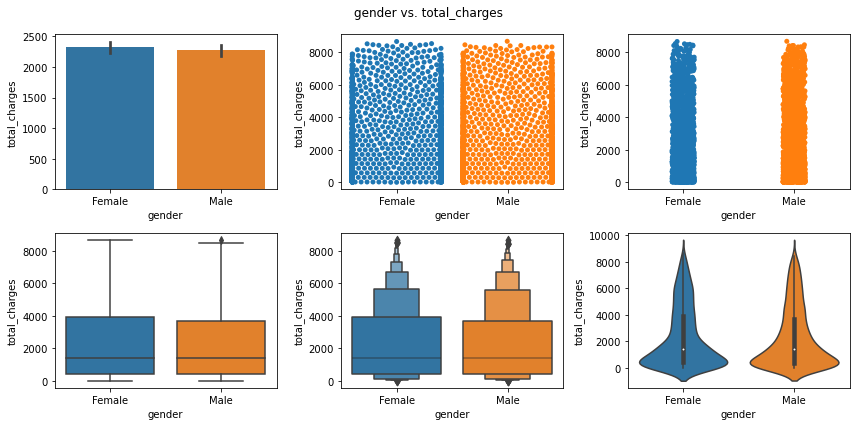

In [106]:
cat_col = 'gender'

for num_col in num_cols:
    fig = plt.figure(figsize = (12,6))
    fig.suptitle(f'{cat_col} vs. {num_col}')
    
    gs = plt.GridSpec(2,3)
    
    ax1 = fig.add_subplot(gs[0,0])
    sns.barplot(x=cat_col, y=num_col, data=train)
    
    ax2 = fig.add_subplot(gs[0,1])
    sns.swarmplot(x=cat_col, y=num_col, data=train)
    
    ax3 = fig.add_subplot(gs[0,2])
    sns.stripplot(x=cat_col, y=num_col, data=train)
    
    ax4 = fig.add_subplot(gs[1,0])
    sns.boxplot(x=cat_col, y=num_col, data=train)
    
    ax5 = fig.add_subplot(gs[1,1])
    sns.boxenplot(x=cat_col, y=num_col, data=train)
    
    ax6 = fig.add_subplot(gs[1,2])
    sns.violinplot(x=cat_col, y=num_col, data=train)
    
    plt.tight_layout();
    

In [117]:
cat_cols = train.select_dtypes('object').columns.tolist()
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [118]:
num_cols = train.select_dtypes('number').columns.tolist()
num_cols

['tenure', 'monthly_charges', 'total_charges']



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gender
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


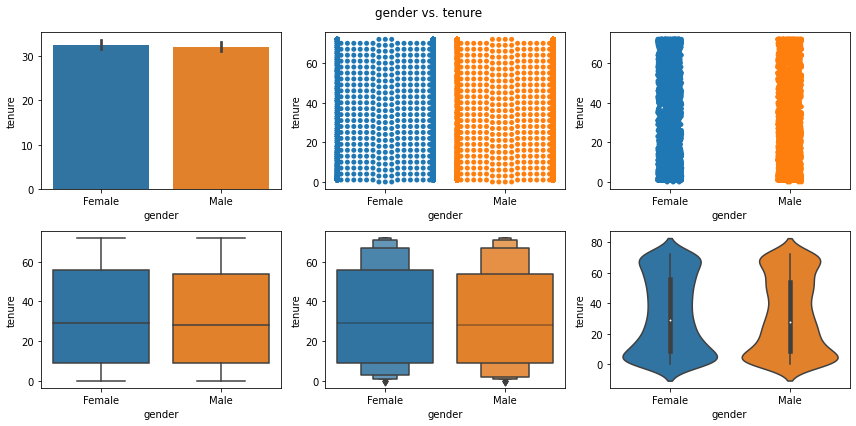

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


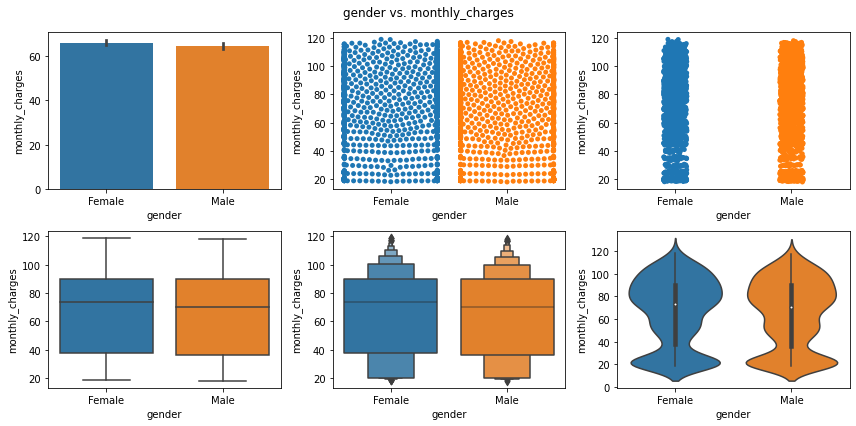

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


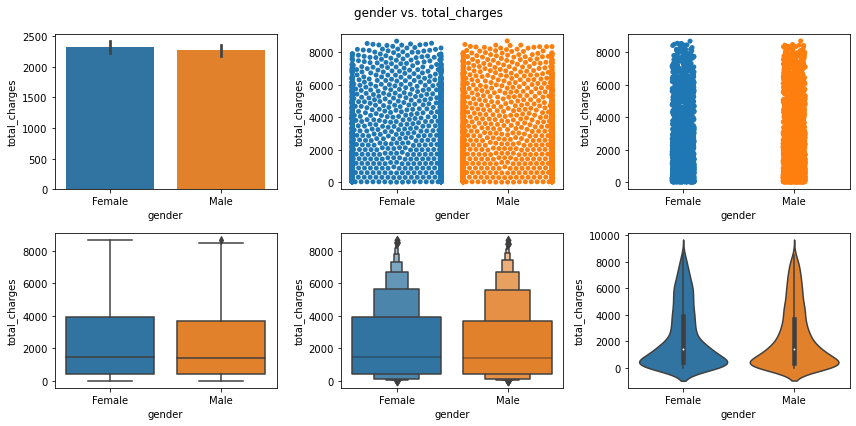



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
senior_citizen
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


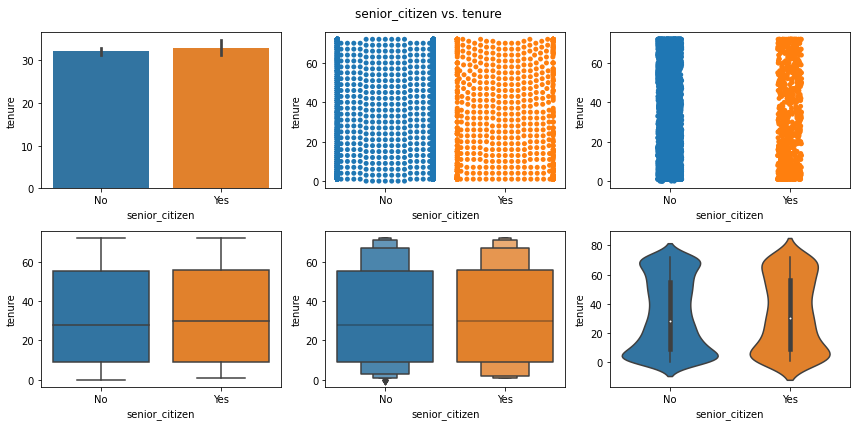

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


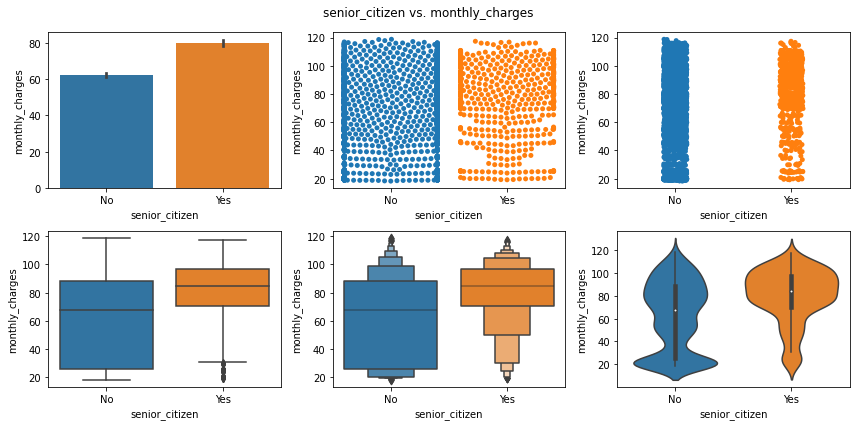

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


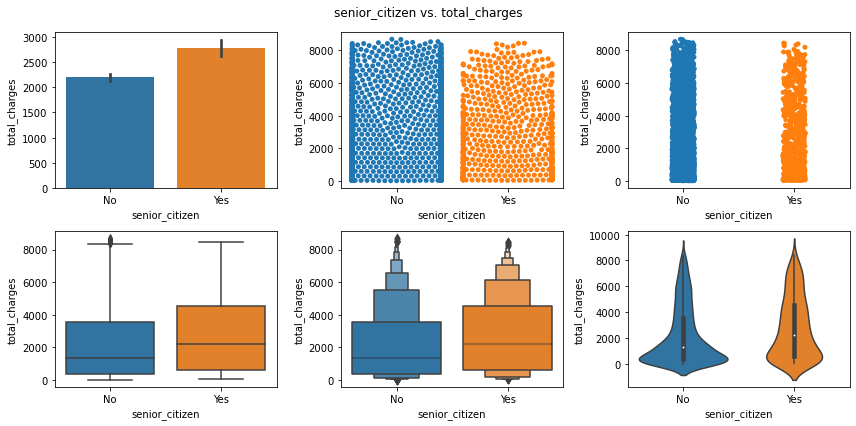



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
partner
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


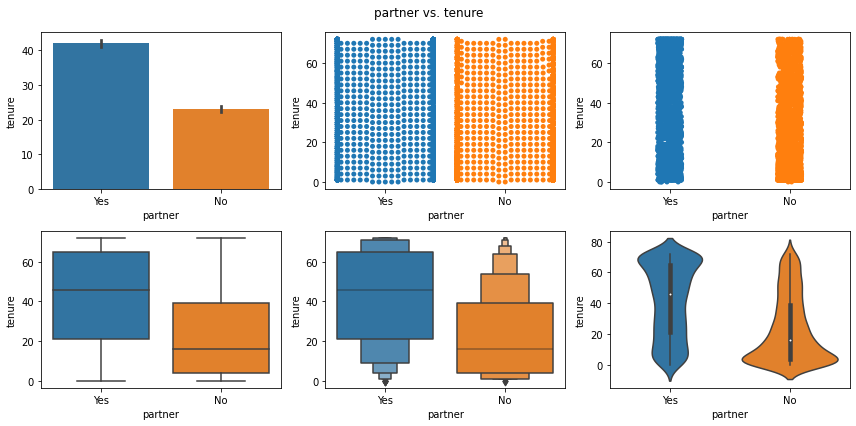

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


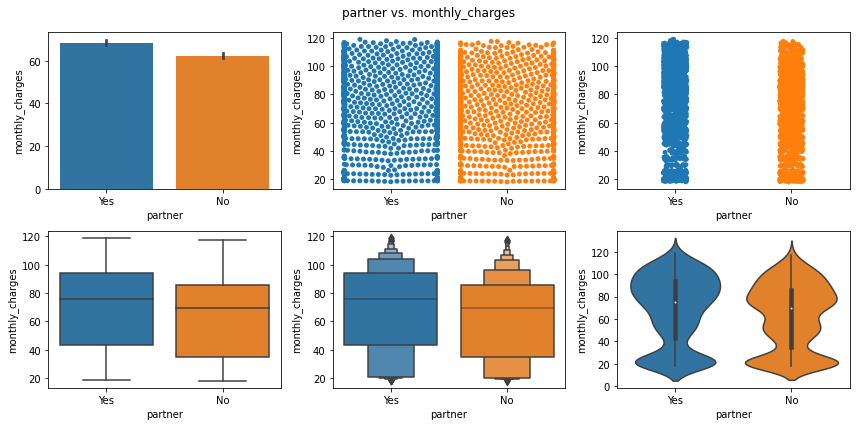

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


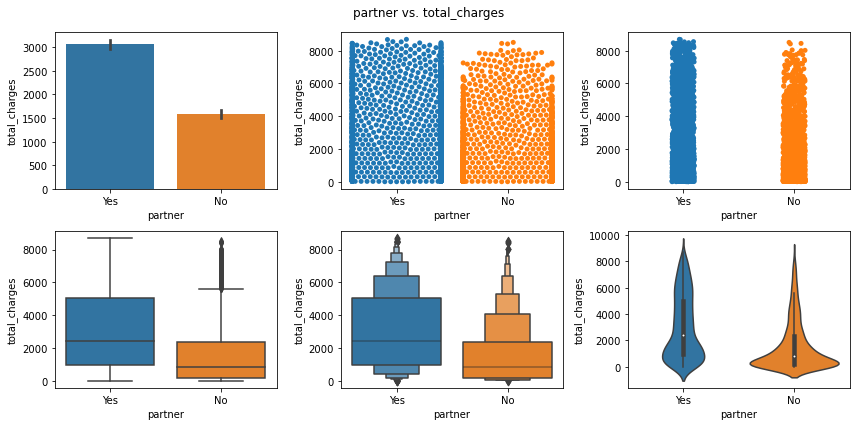



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dependents
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


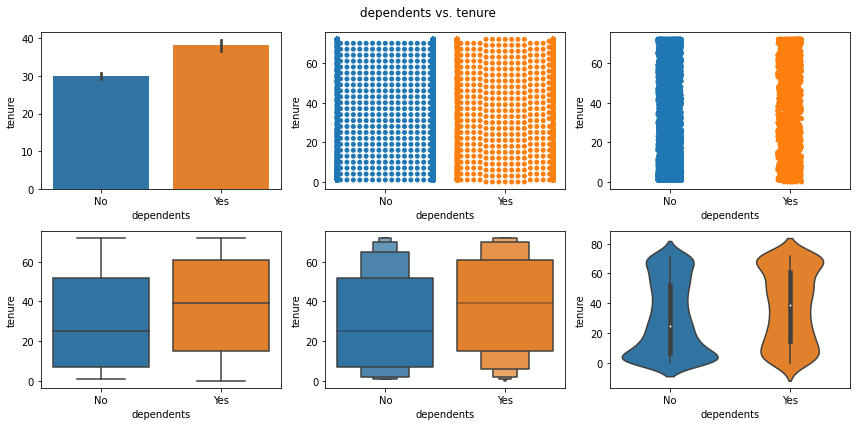

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


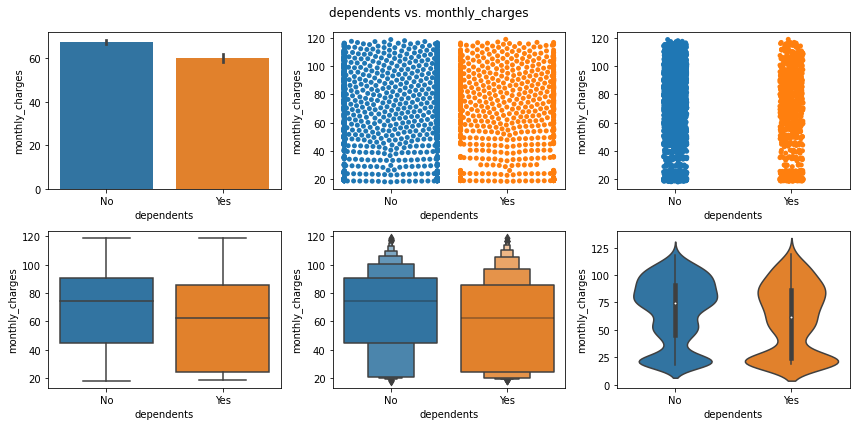

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


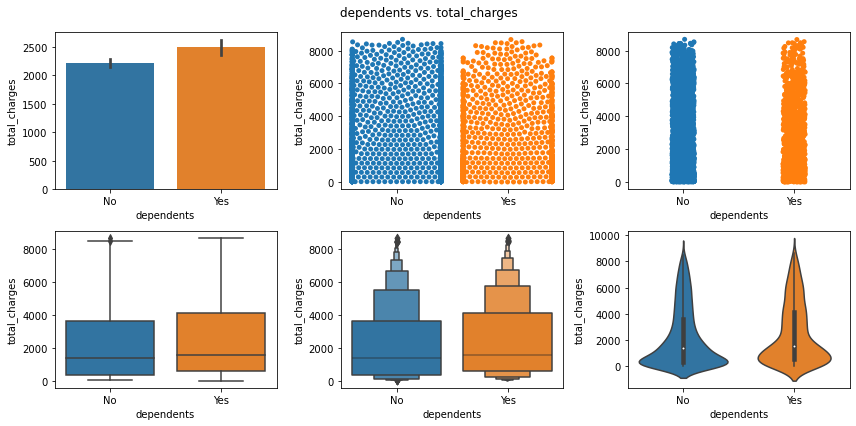



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
phone_service
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


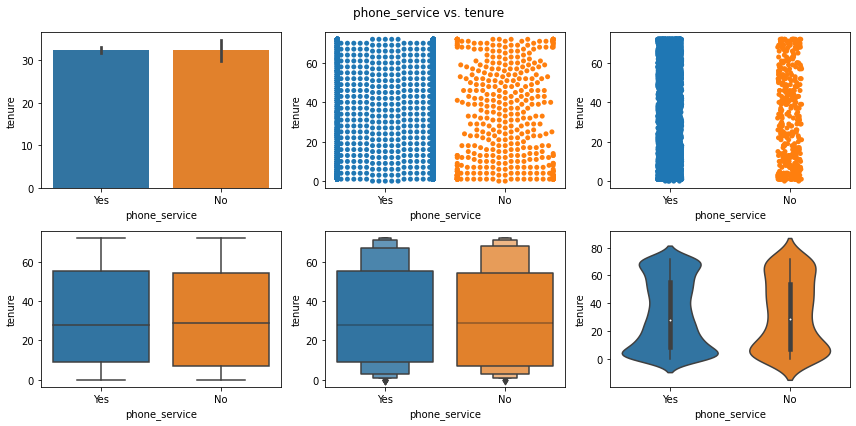

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


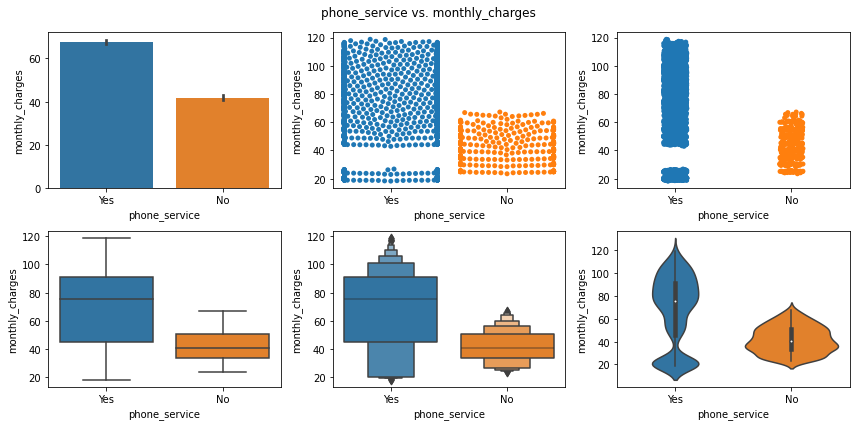

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


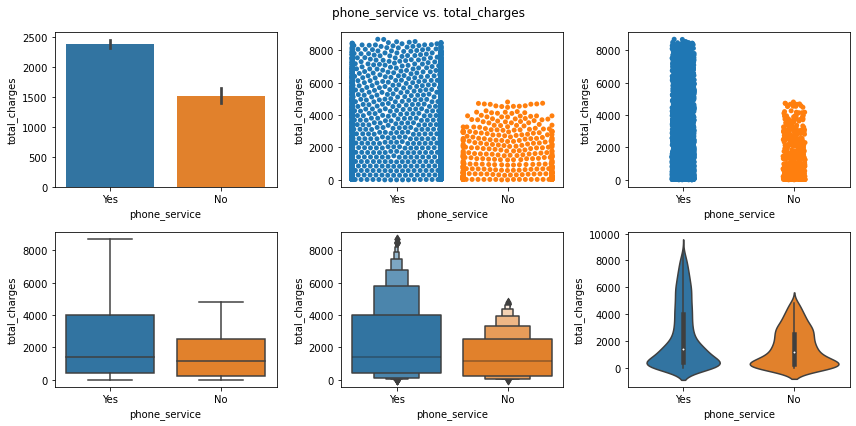



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
multiple_lines
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


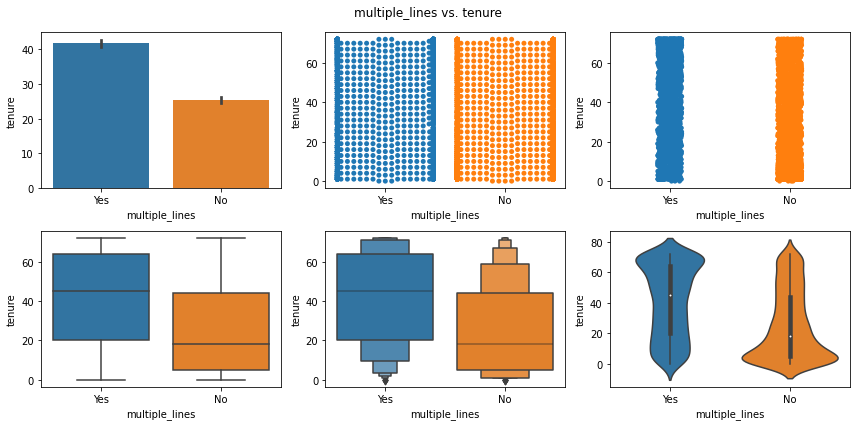

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


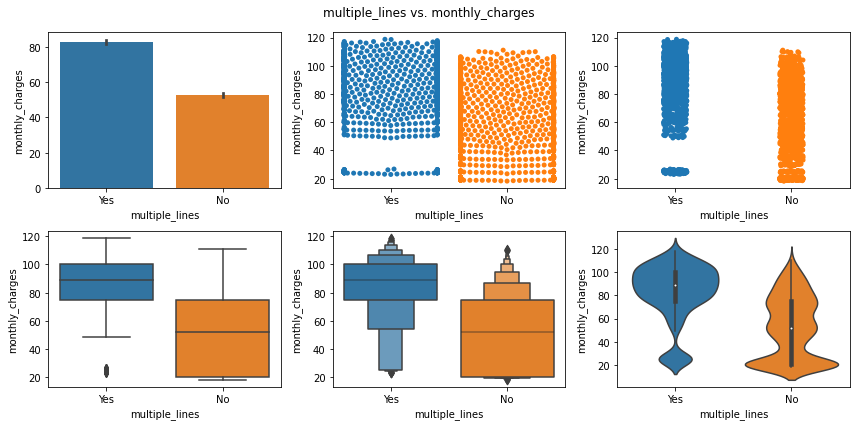

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


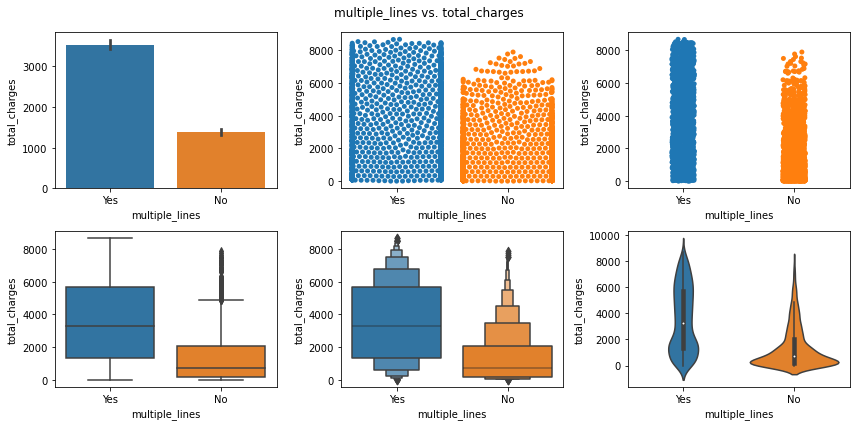



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
online_security
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


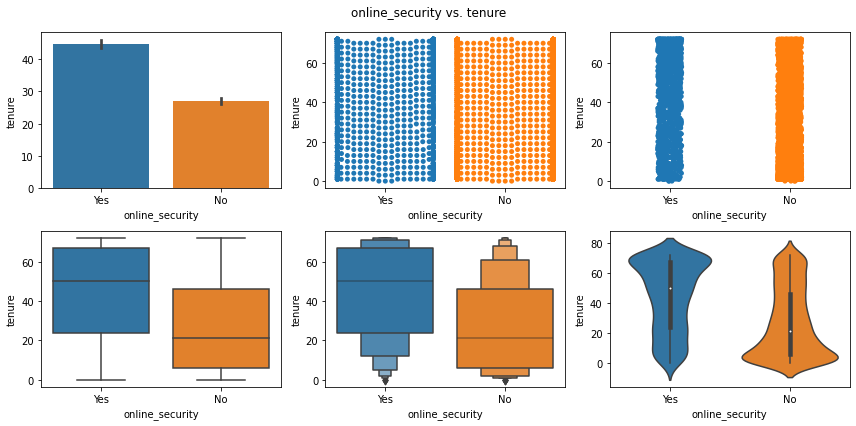

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


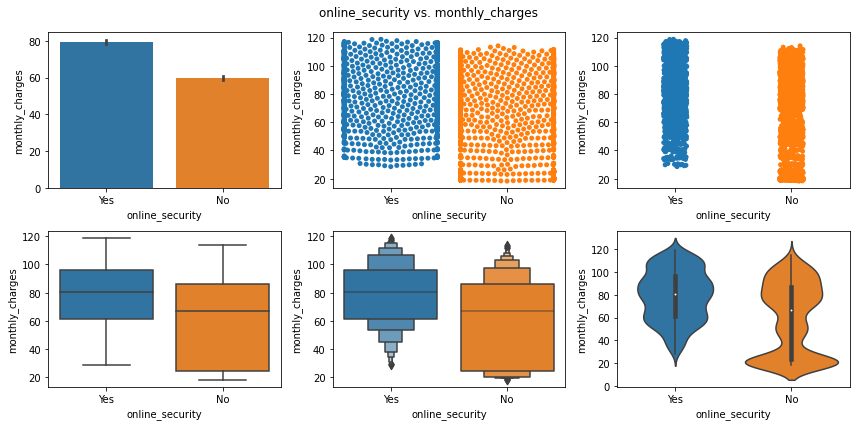

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


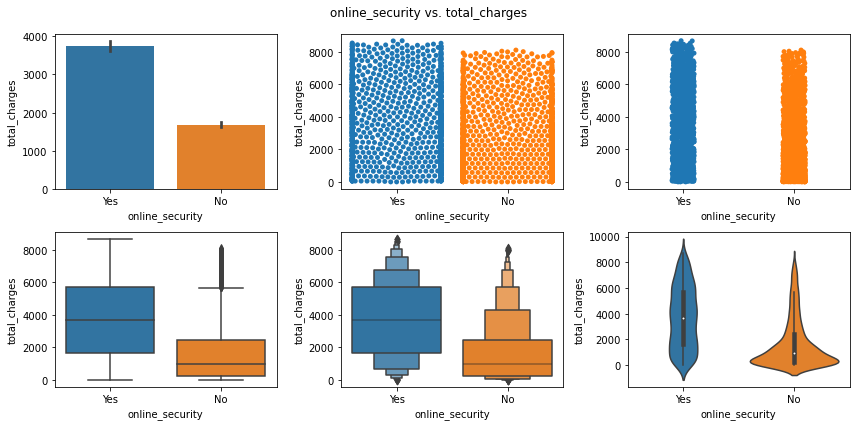



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
online_backup
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


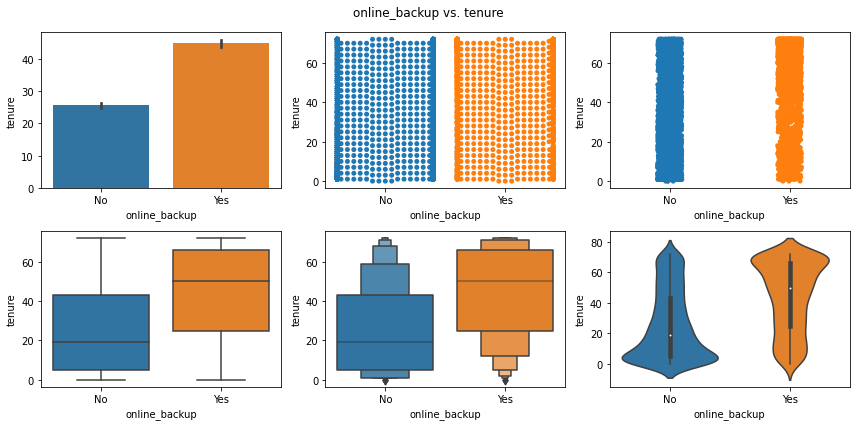

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


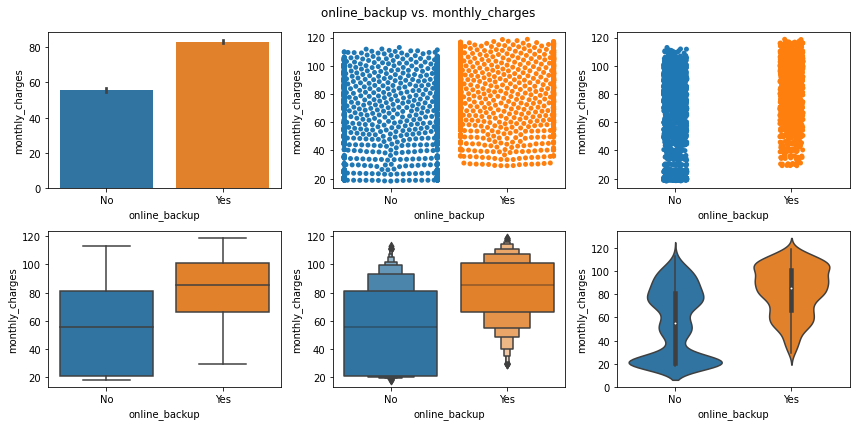

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


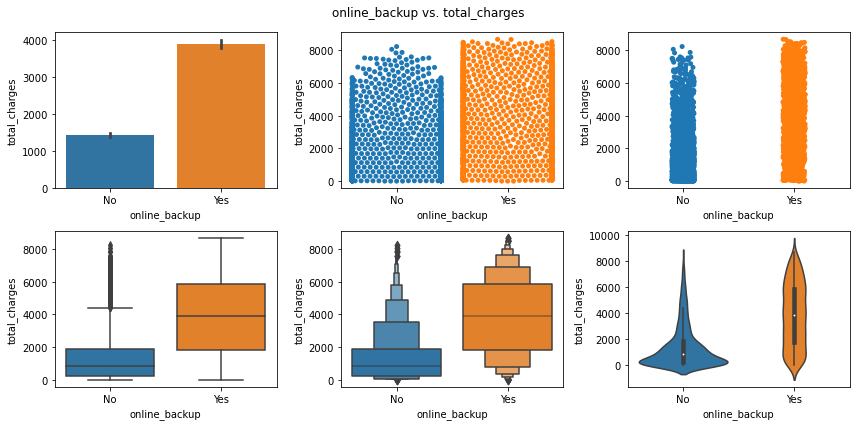



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
device_protection
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


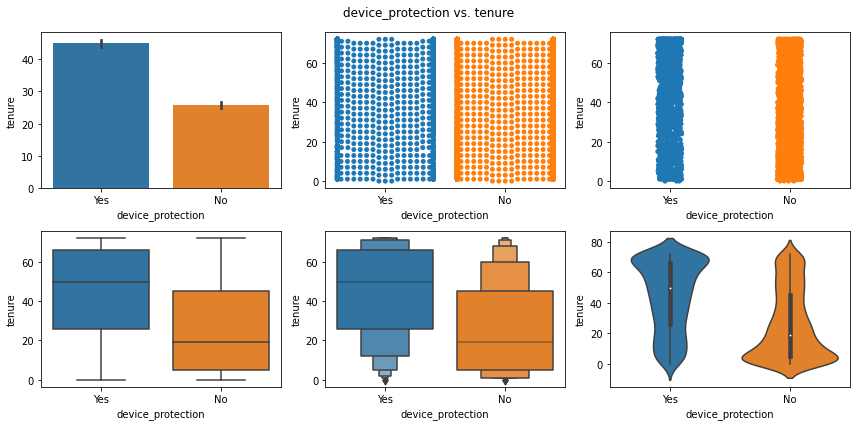

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


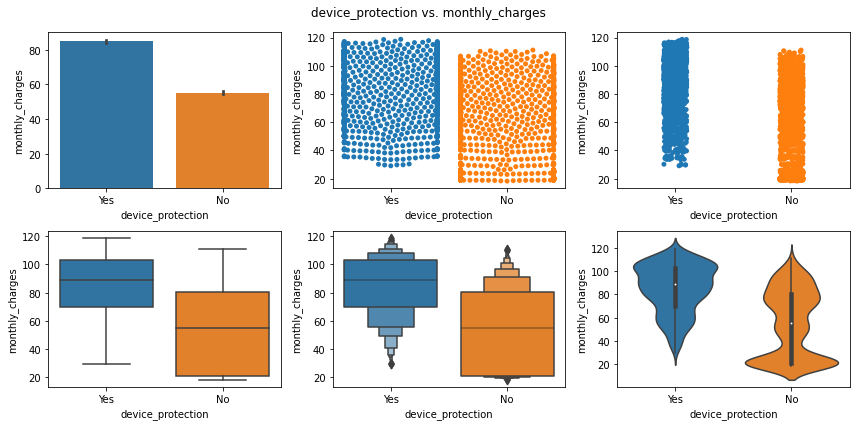

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


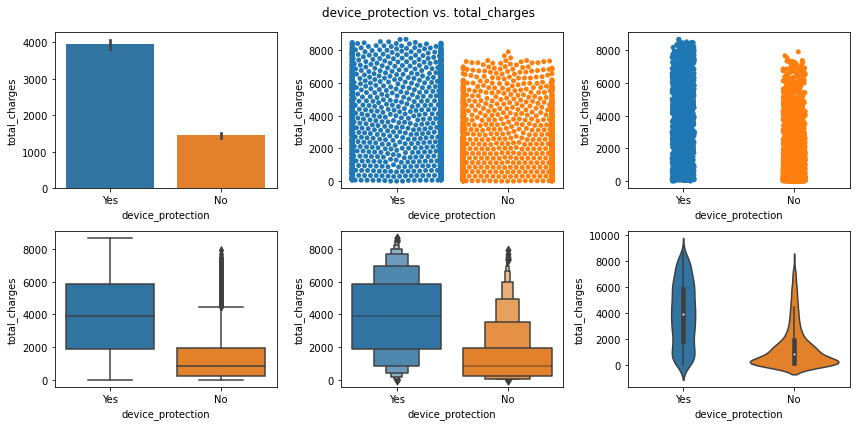



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tech_support
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


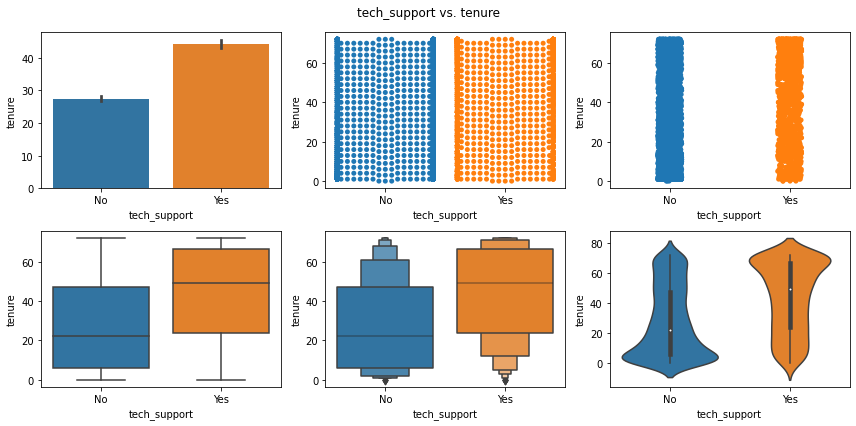

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


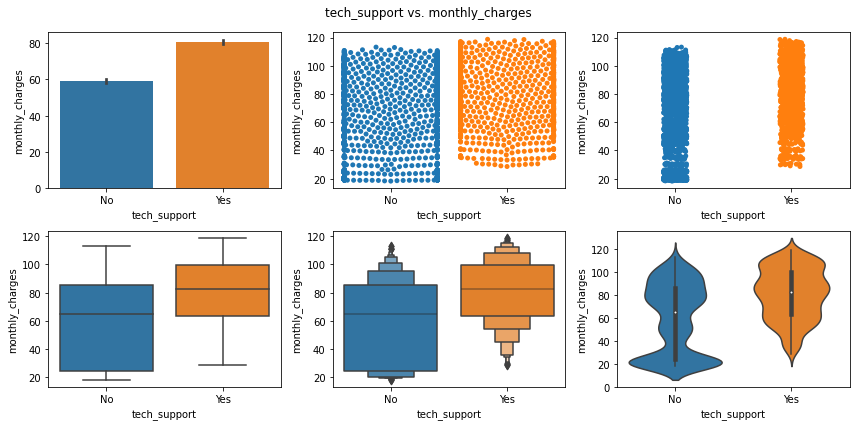

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


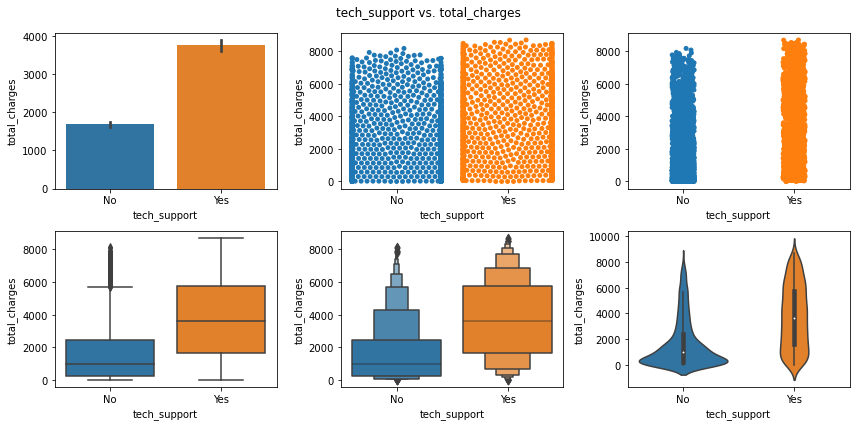



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
streaming_tv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


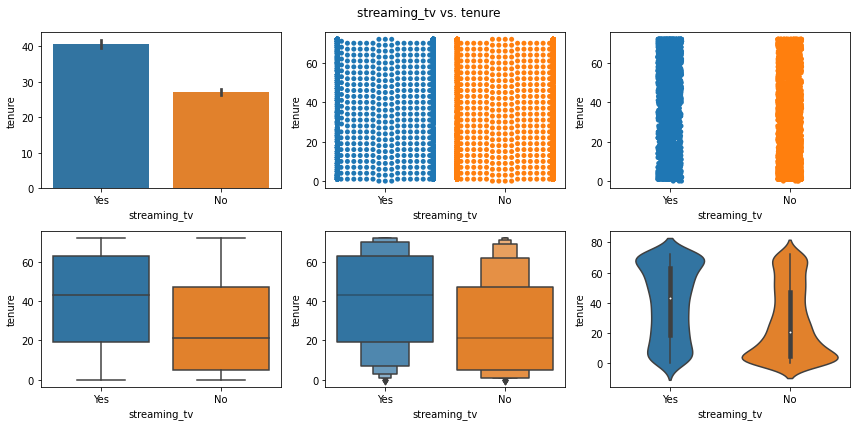

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


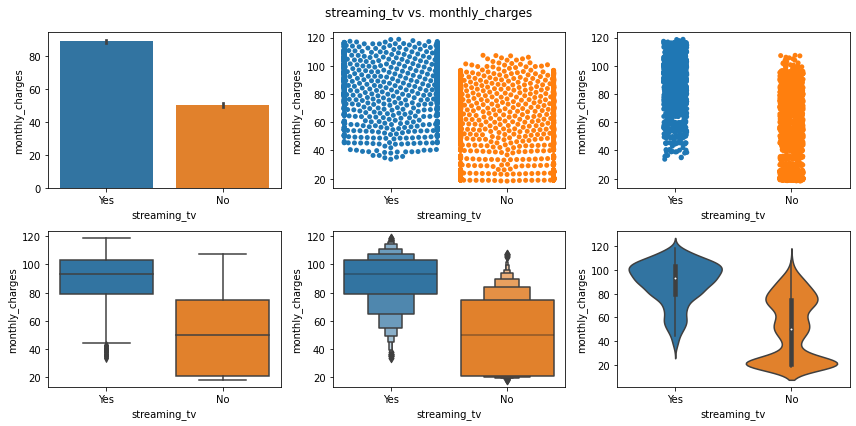

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


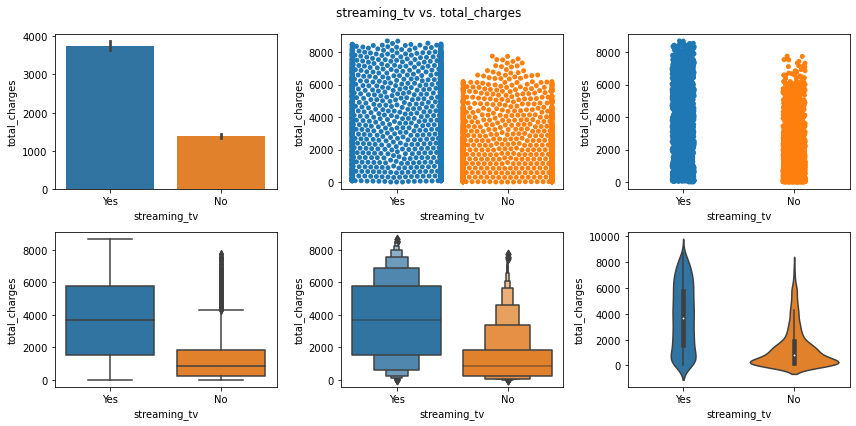



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
streaming_movies
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


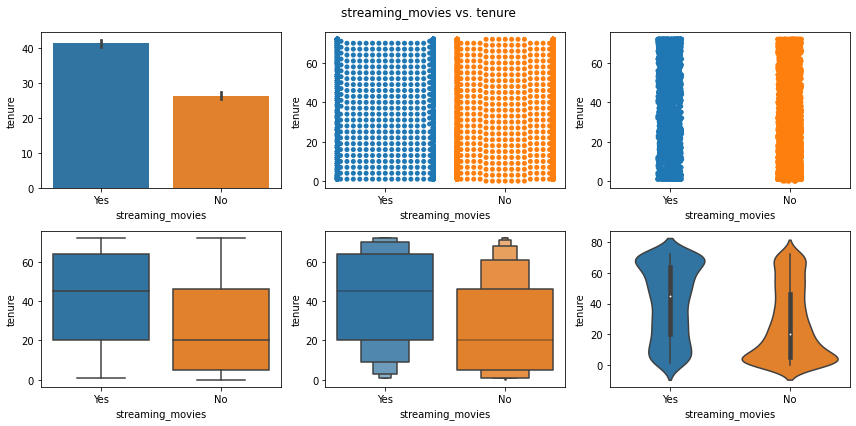

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


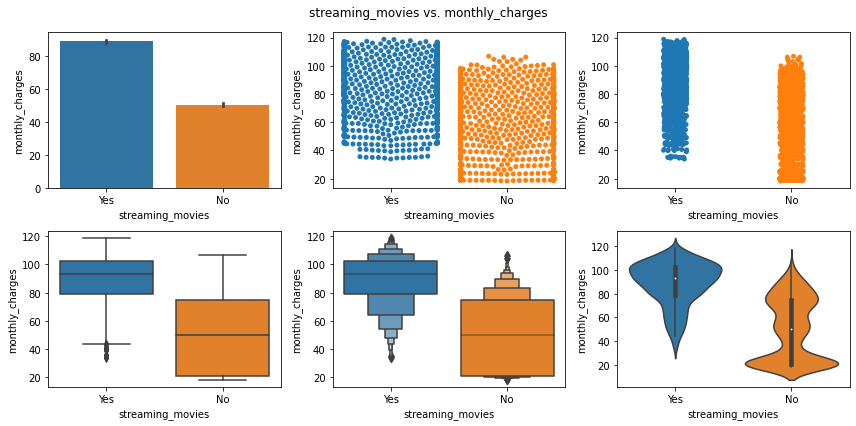

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


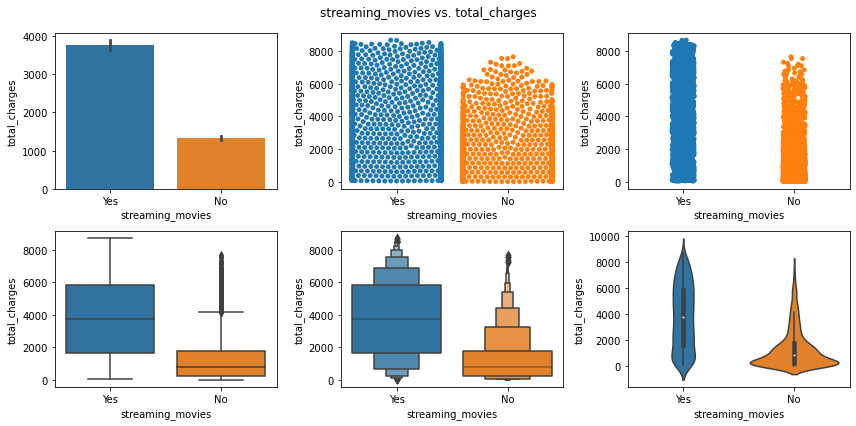



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
paperless_billing
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


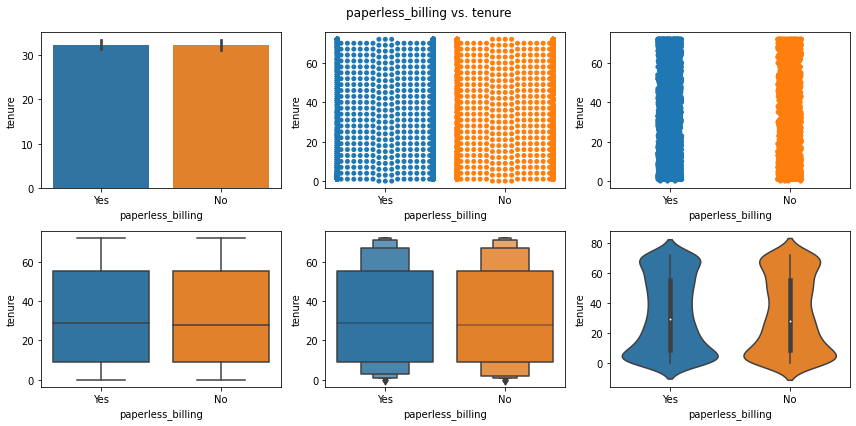

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


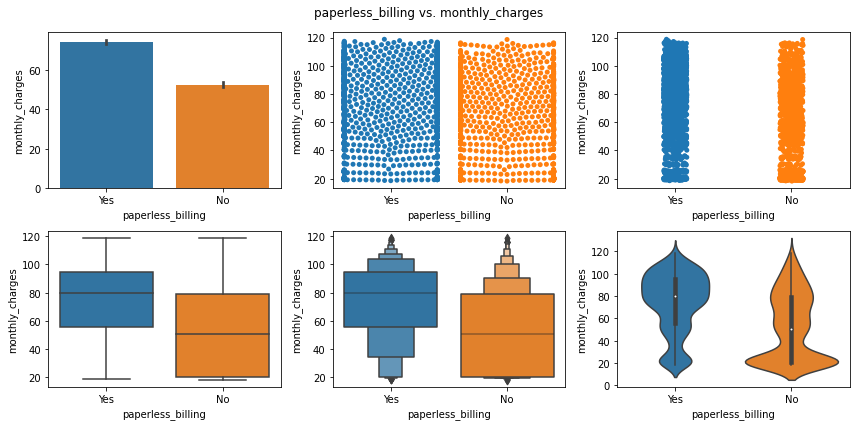

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


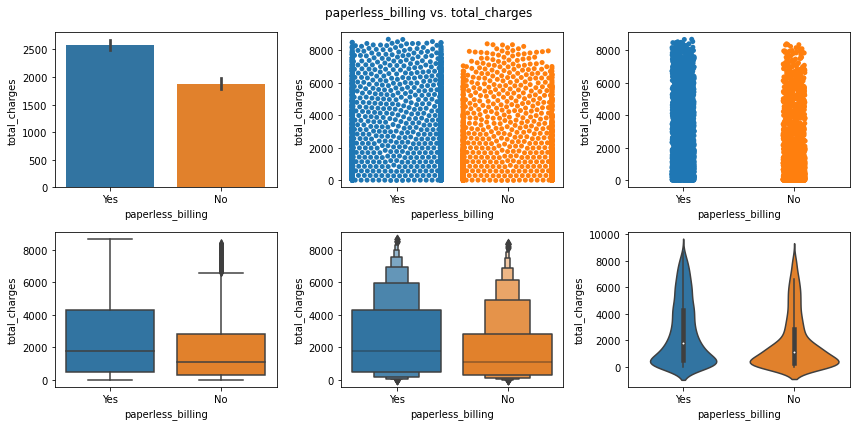



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
churn
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


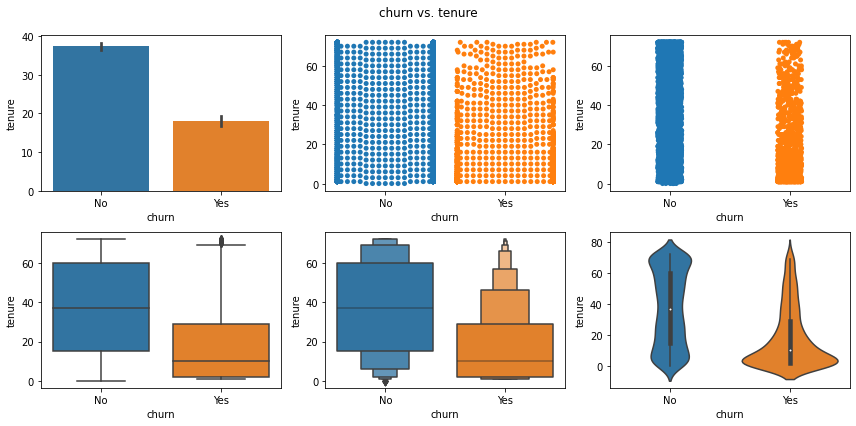

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


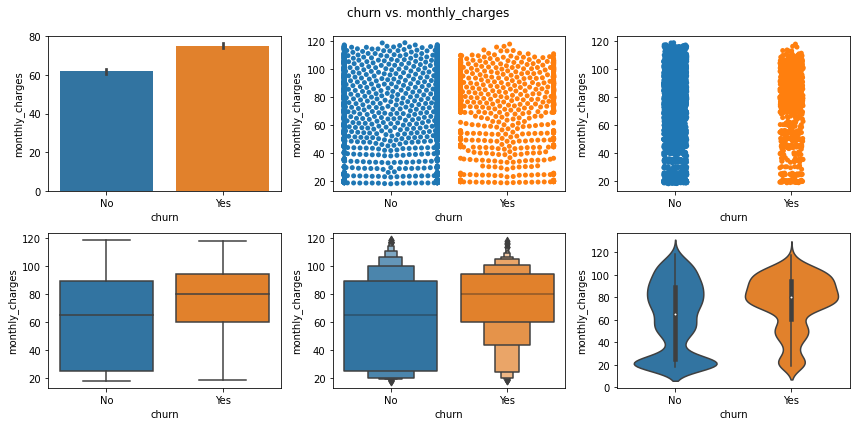

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


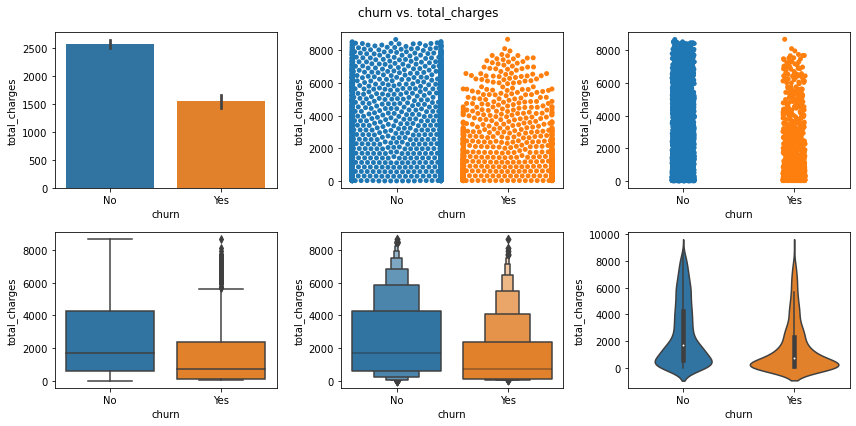



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
internet_service_type
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


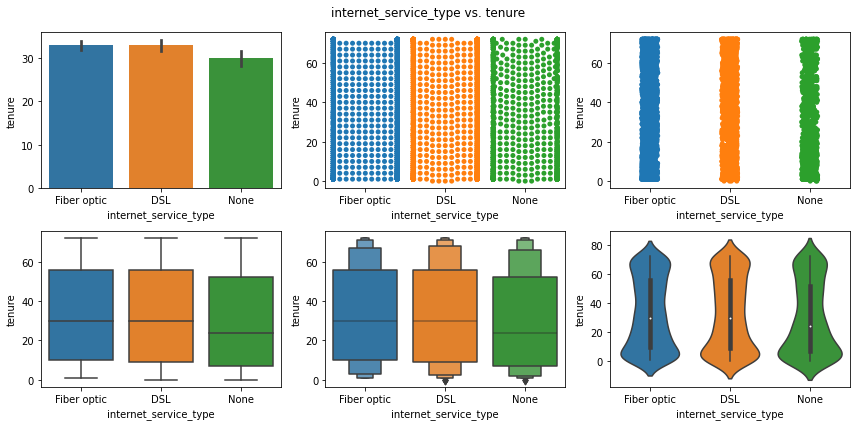

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


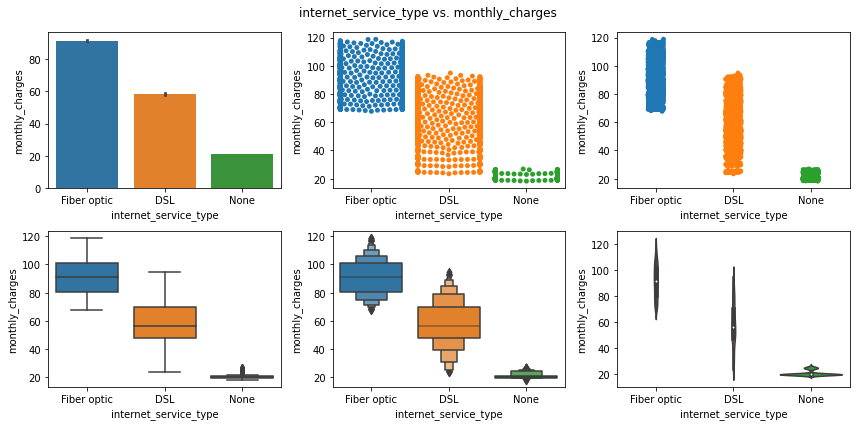

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


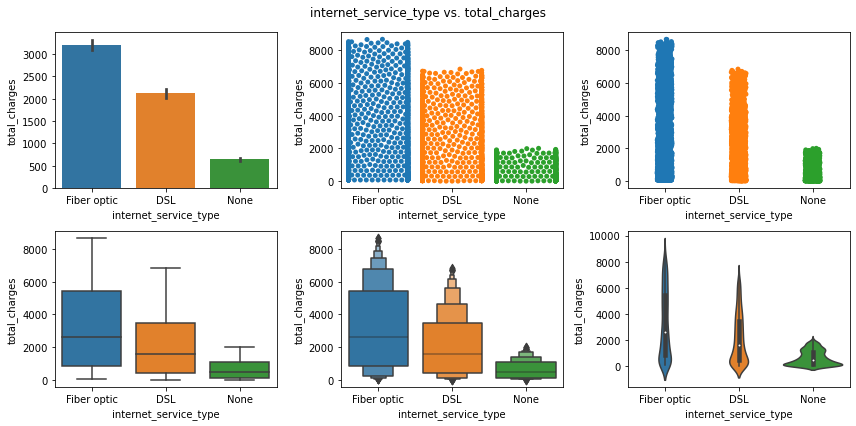



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
contract_type
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


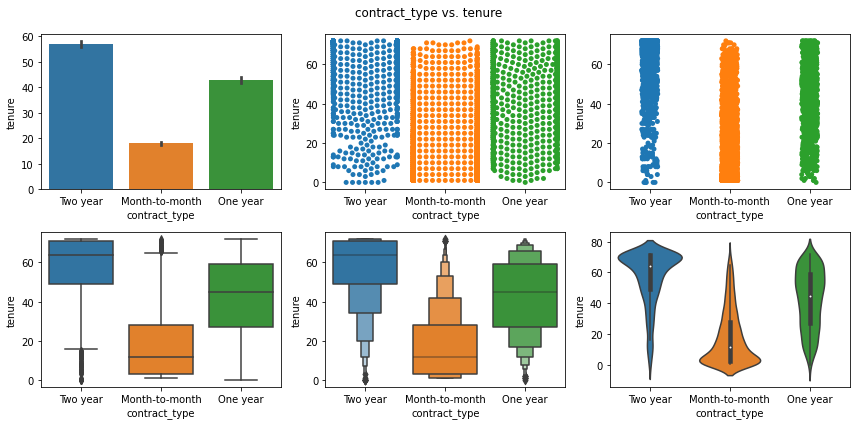

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


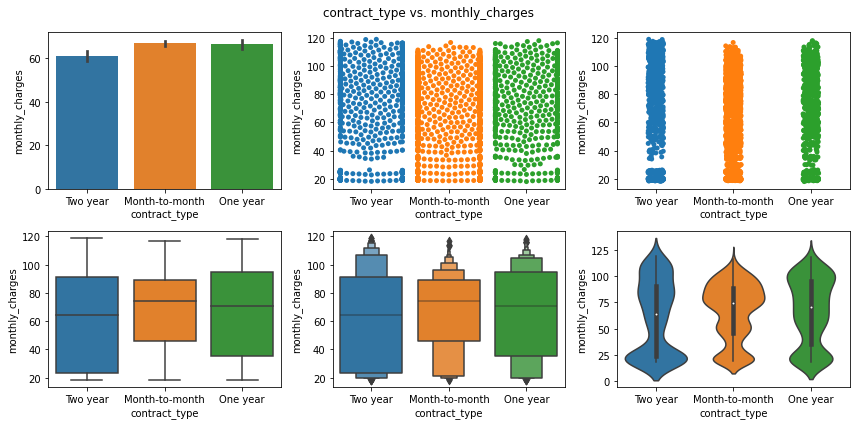

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


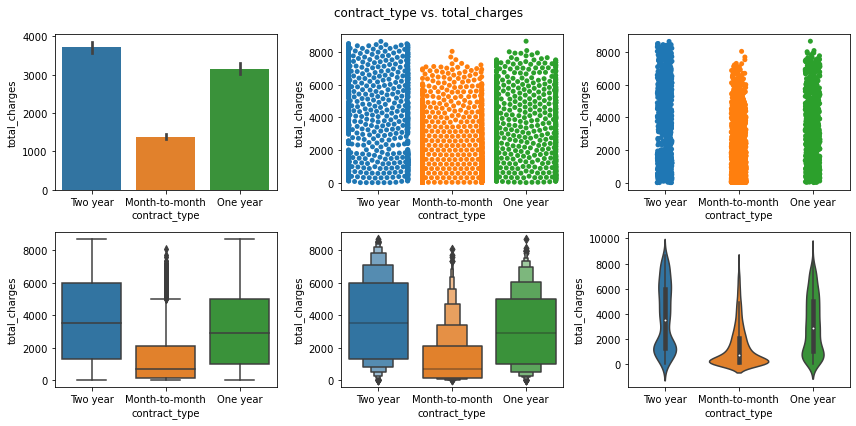



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
payment_type
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


----------------------------------------------------------------------------------------------------------
tenure
----------------------------------------------------------------------------------------------------------


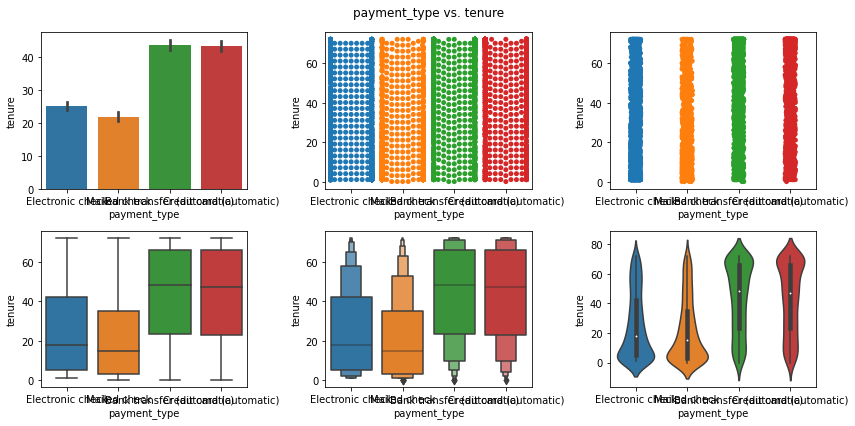

----------------------------------------------------------------------------------------------------------
monthly_charges
----------------------------------------------------------------------------------------------------------


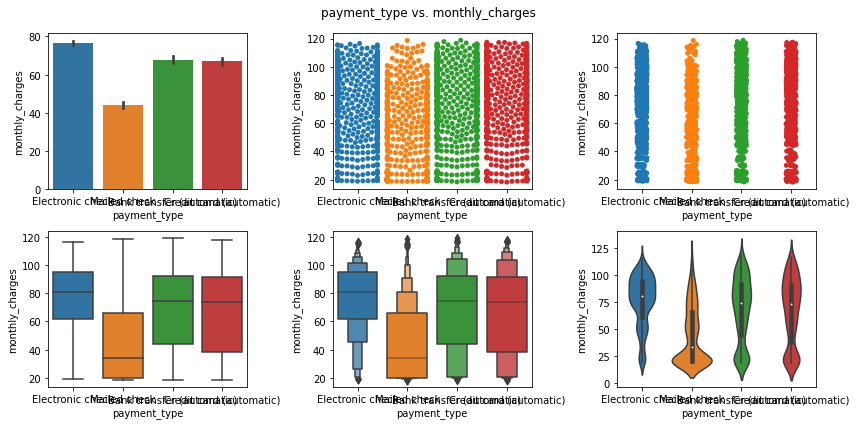

----------------------------------------------------------------------------------------------------------
total_charges
----------------------------------------------------------------------------------------------------------


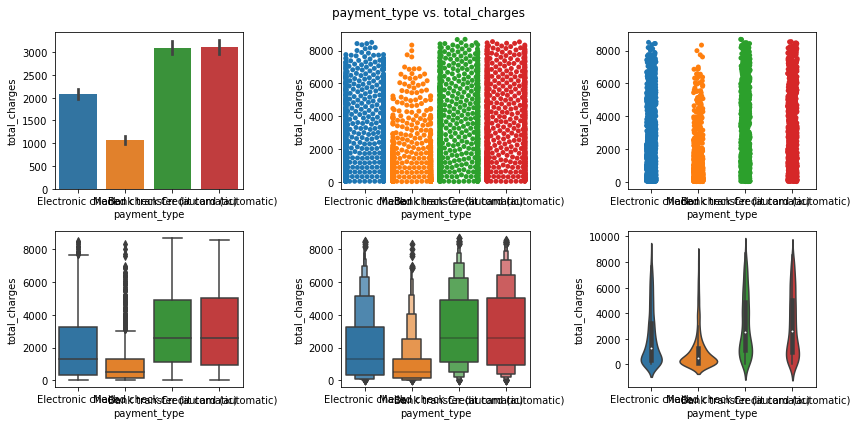

In [121]:
for cat_col in cat_cols:
    
    print('\n')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(cat_col)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('\n')
    
    for num_col in num_cols:
        
        print('----------------------------------------------------------------------------------------------------------')
        print(num_col)
        print('----------------------------------------------------------------------------------------------------------')
       
        fig = plt.figure(figsize = (12,6))
        fig.suptitle(f'{cat_col} vs. {num_col}')
        
        gs = plt.GridSpec(2,3)
        
        ax1 = fig.add_subplot(gs[0,0])
        sns.barplot(x=cat_col, y=num_col, data=train)
        plt.xticks(rotation = 90)
        
        ax2 = fig.add_subplot(gs[0,1])
        sns.swarmplot(x=cat_col, y=num_col, data=train)
        plt.xticks(rotation = 90)
        
        ax3 = fig.add_subplot(gs[0,2])
        sns.stripplot(x=cat_col, y=num_col, data=train)
        plt.xticks(rotation = 90)
        
        ax4 = fig.add_subplot(gs[1,0])
        sns.boxplot(x=cat_col, y=num_col, data=train)
        plt.xticks(rotation = 90)
        
        ax5 = fig.add_subplot(gs[1,1])
        sns.boxenplot(x=cat_col, y=num_col, data=train)
        plt.xticks(rotation = 90)
        
        ax6 = fig.add_subplot(gs[1,2])
        sns.violinplot(x=cat_col, y=num_col, data=train)
        plt.xticks(rotation = 90)
        
        plt.tight_layout()
        plt.show();
        

In [122]:
def plot_categorical_and_continuous_vars(df, cat_cols, num_cols):
    for cat_col in cat_cols:
        
        print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print(cat_col)
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        
        for num_col in num_cols:
            
            print('\n----------------------------------------------------------------------------------------------------------')
            print(num_col)
            print('----------------------------------------------------------------------------------------------------------\n')
           
            fig = plt.figure(figsize = (12,6))
            fig.suptitle(f'{cat_col} vs. {num_col}')
            
            gs = plt.GridSpec(2,3)
            
            ax1 = fig.add_subplot(gs[0,0])
            sns.barplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax2 = fig.add_subplot(gs[0,1])
            sns.swarmplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax3 = fig.add_subplot(gs[0,2])
            sns.stripplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax4 = fig.add_subplot(gs[1,0])
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax5 = fig.add_subplot(gs[1,1])
            sns.boxenplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            ax6 = fig.add_subplot(gs[1,2])
            sns.violinplot(x=cat_col, y=num_col, data=df)
            plt.xticks(rotation = 90)
            
            plt.tight_layout()
            plt.show();

## 5.

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

## 6.

Explore your dataset with any other visualizations you think will be helpful.

***Visualizations above are sufficient for this dataset at this time***

## 7.

In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

**See explore_mall_customers.ipynb**